# 1. load the clean data

In [13]:
import pandas as pd
import numpy as np
df_all = pd.read_csv('./Result.csv') 
df_all.head()

,zipcode,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,98119,4,1.0,1.0,1.0,85.0,95.0
1,98119,4,1.0,1.0,1.0,150.0,96.0
2,98119,11,4.5,5.0,7.0,975.0,97.0
3,98119,6,2.0,3.0,3.0,450.0,92.0
4,98119,2,1.0,1.0,1.0,120.0,95.0


In [14]:
df = df_all
print(f'Number of points: {len(df)}')
df.head()

Number of points: 3147


,zipcode,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,98119,4,1.0,1.0,1.0,85.0,95.0
1,98119,4,1.0,1.0,1.0,150.0,96.0
2,98119,11,4.5,5.0,7.0,975.0,97.0
3,98119,6,2.0,3.0,3.0,450.0,92.0
4,98119,2,1.0,1.0,1.0,120.0,95.0


# 2. Train the model

In [15]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=0)

Text(0, 0.5, 'Price')

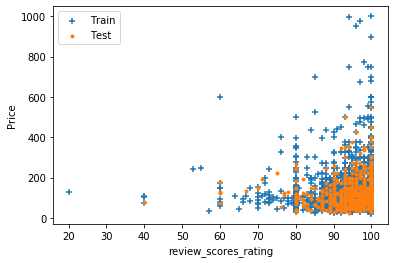

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(train_data['review_scores_rating'], train_data['price'], marker='+', label='Train')
plt.scatter(test_data['review_scores_rating'], test_data['price'], marker='.', label='Test')

# Code to customize the axis labels
plt.legend()
plt.xlabel('review_scores_rating')
plt.ylabel('Price')

In [17]:
# step 1: computer the sqrt of all the feature

from math import sqrt

# All of the features of interest
features = ['accommodates','bathrooms','bedrooms','beds','review_scores_rating']
# Compute the square and sqrt of each feature
all_features = []
for feat in features:
    square_feat = feat + '_square'
    sqrt_feat = feat + '_sqrt'
    
    df[square_feat] = df[feat] ** 2
    df[sqrt_feat] = df[feat].apply(sqrt)
    
    all_features.extend([feat, square_feat, sqrt_feat])
print(all_features)    
df.head()



['accommodates', 'accommodates_square', 'accommodates_sqrt', 'bathrooms', 'bathrooms_square', 'bathrooms_sqrt', 'bedrooms', 'bedrooms_square', 'bedrooms_sqrt', 'beds', 'beds_square', 'beds_sqrt', 'review_scores_rating', 'review_scores_rating_square', 'review_scores_rating_sqrt']


,zipcode,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,accommodates_square,accommodates_sqrt,bathrooms_square,bathrooms_sqrt,bedrooms_square,bedrooms_sqrt,beds_square,beds_sqrt,review_scores_rating_square,review_scores_rating_sqrt
0,98119,4,1.0,1.0,1.0,85.0,95.0,16,2.000000,1.00,1.000000,1.0,1.000000,1.0,1.000000,9025.0,9.746794
1,98119,4,1.0,1.0,1.0,150.0,96.0,16,2.000000,1.00,1.000000,1.0,1.000000,1.0,1.000000,9216.0,9.797959
2,98119,11,4.5,5.0,7.0,975.0,97.0,121,3.316625,20.25,2.121320,25.0,2.236068,49.0,2.645751,9409.0,9.848858
3,98119,6,2.0,3.0,3.0,450.0,92.0,36,2.449490,4.00,1.414214,9.0,1.732051,9.0,1.732051,8464.0,9.591663
4,98119,2,1.0,1.0,1.0,120.0,95.0,4,1.414214,1.00,1.000000,1.0,1.000000,1.0,1.000000,9025.0,9.746794


In [18]:
# # step 2:standardized (mean 0, std. dev. 1)
# def standardize(v):
#     std = v.std()
#     if std == 0:
#         return np.zeros(len(v))
#     else:
#         return (v - v.mean()) / std

# # Standardize each of the features
# for feature in all_features:
#     df[feature] = standardize(df[feature])

# # Preview
# df.head()

In [19]:
# step 3 split the data:
from sklearn.model_selection import train_test_split

train_and_validation, test = train_test_split(df, test_size=0.2, random_state=6)
train, validation = train_test_split(train_and_validation, test_size=0.125, random_state=6)
print(len(test)/len(df))#20% to test
print(len(validation)/len(df))#10% for validation
print(len(train)/len(df))

0.2001906577693041
0.10009532888465204
0.6997140133460439


Mean squared error: 3658.79


Text(0, 0.5, 'Price')

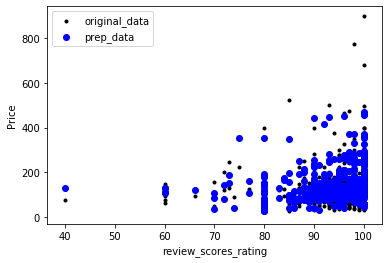

In [20]:
# TODO Train a linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
regr = linear_model.LinearRegression()
model=regr.fit(train[all_features], train['price'])

y_pred = regr.predict(test[all_features])
y_test = test['price']
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
RSS=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(RSS)

import matplotlib.pyplot as plt
plt.scatter(test['review_scores_rating'], y_test, marker='.',  color='black',label='original_data')
plt.scatter(test['review_scores_rating'], y_pred, color='blue',label='prep_data')

# Code to customize the axis labels
plt.legend()
plt.xlabel('review_scores_rating')
plt.ylabel('Price')

# test for input:

In [21]:
# input:
data = {'accommodates':[1],'bathrooms':[1],'bedrooms':[1],'beds':[1],'review_scores_rating': [90]}
dfn = pd.DataFrame(data)
all_features = []
features = ['accommodates','bathrooms','bedrooms','beds','review_scores_rating']
for feat in features:
    square_feat = feat + '_square'
    sqrt_feat = feat + '_sqrt'
    dfn[square_feat] = dfn[feat] ** 2
    dfn[sqrt_feat] = dfn[feat].apply(sqrt)
    all_features.extend([feat, square_feat, sqrt_feat])
dfn.head()

,accommodates,bathrooms,bedrooms,beds,review_scores_rating,accommodates_square,accommodates_sqrt,bathrooms_square,bathrooms_sqrt,bedrooms_square,bedrooms_sqrt,beds_square,beds_sqrt,review_scores_rating_square,review_scores_rating_sqrt
0,1,1,1,1,90,1,1.0,1,1.0,1,1.0,1,1.0,8100,9.486833


In [25]:
output = regr.predict(dfn[all_features])
print(output)

[41.00359493]


In [26]:
coef = model.coef_

In [27]:
len(coef)

15

In [28]:
coef


array([-1.83837091e+01, -3.20326998e-02,  1.34496137e+02,  8.61769630e+01,
       -6.66696707e+00, -8.86137549e+01,  2.16864018e+01,  8.38746476e+00,
       -3.86307155e+01,  2.69403104e+01, -1.14490092e+00, -7.95264839e+01,
       -4.49132677e+01,  1.30291913e-01,  4.25632233e+02])

In [29]:
all_features

['accommodates',
 'accommodates_square',
 'accommodates_sqrt',
 'bathrooms',
 'bathrooms_square',
 'bathrooms_sqrt',
 'bedrooms',
 'bedrooms_square',
 'bedrooms_sqrt',
 'beds',
 'beds_square',
 'beds_sqrt',
 'review_scores_rating',
 'review_scores_rating_square',
 'review_scores_rating_sqrt']